In [5]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from mpl_toolkits.mplot3d import Axes3D

(trainX,trainY),(testX,testY) = mnist.load_data()
visit = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
i = 0
i1=0
while(i1!=10):
	if(visit[trainY[i]]==-1):
		i1+=1
		visit[trainY[i]]=i
	i+=1

In [6]:
def plot_data_2d(Y,s):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component '+str(s), fontsize = 20)

    targets = [0,1,2,3,4,5,6,7,8,9]
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    for target, color in zip(targets,colors):
        indicesToKeep = [i for i, value in enumerate(trainY[:1000]) if value == target]
        Y1 = Y[indicesToKeep]
        ax.scatter(Y1[:,0]
                , Y1[:,1]
                , c = color
                , s = 50)
    ax.legend(targets)
    ax.grid()

In [7]:
def plot_data_3d(Y,s):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111,projection='3d')
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)
    ax.set_title('3 Component '+str(s), fontsize = 20)

    targets = [0,1,2,3,4,5,6,7,8,9]
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    for target, color in zip(targets,colors):
        indicesToKeep = [i for i, value in enumerate(trainY[:1000]) if value == target]
        Y1 = Y[indicesToKeep]
        ax.scatter(Y1[:,0]
                , Y1[:,1]
                , Y1[:,2]
                , c = color
                , s = 50)
    ax.legend(targets)
    ax.grid()

In [16]:
def plot_basis(Y,s,r):
    if(r==2):
        fig = plt.figure(figsize = (10,10))
        ax = fig.add_subplot(1,1,1)
        ax.set_xlabel('Basis Component 1', fontsize = 15)
        ax.set_ylabel('Basis Component 2', fontsize = 15)
        ax.set_title('2 Basis '+str(s), fontsize = 20)
        ax.scatter(Y[:,0]
                , Y[:,1]
                )
        ax.grid()
    if(r==3):
        fig = plt.figure(figsize = (10,10))
        ax = fig.add_subplot(111,projection='3d')
        ax.set_xlabel('basis Component 1', fontsize = 15)
        ax.set_ylabel('basis Component 2', fontsize = 15)
        ax.set_zlabel('basis Component 3', fontsize = 15)
        ax.set_title('3 Component '+str(s), fontsize = 20)
        ax.scatter(Y[:,0]
                , Y[:,1]
                , Y[:,2]
                )
        ax.grid()

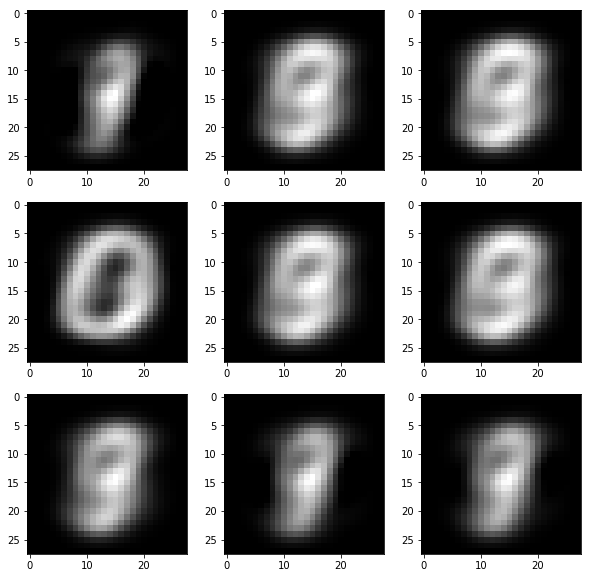

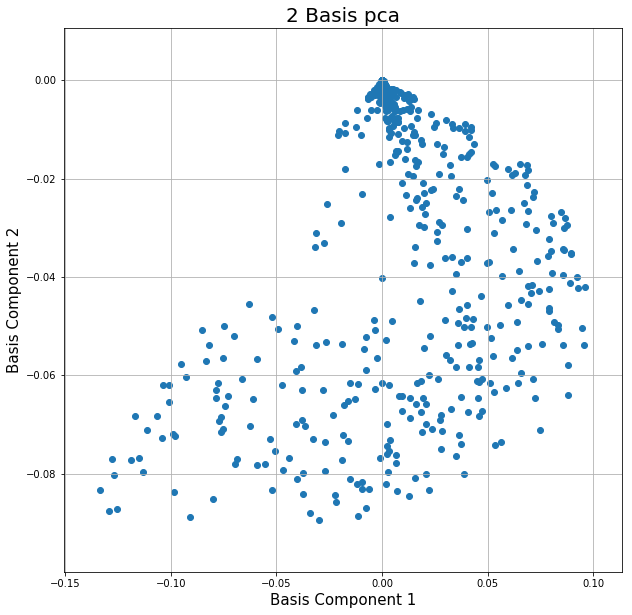

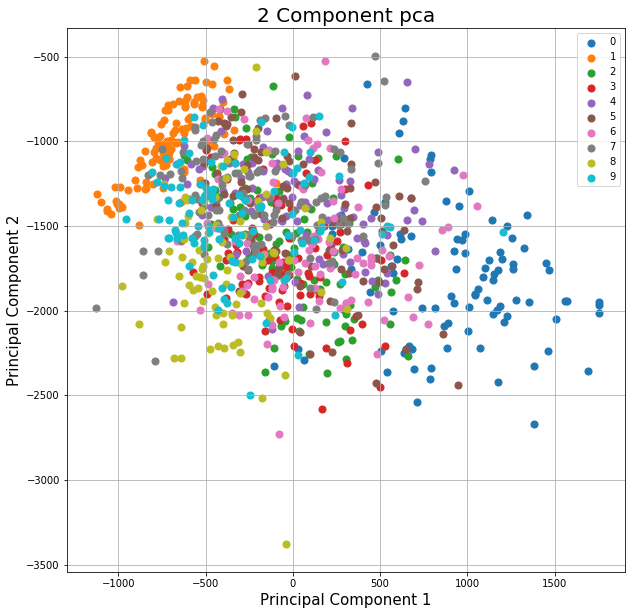

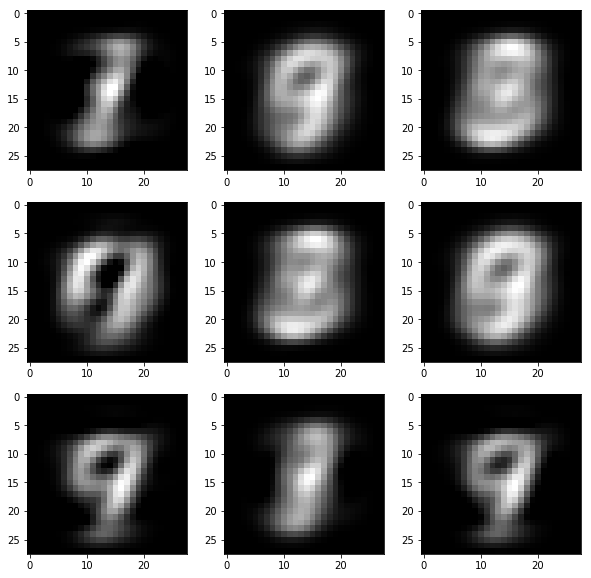

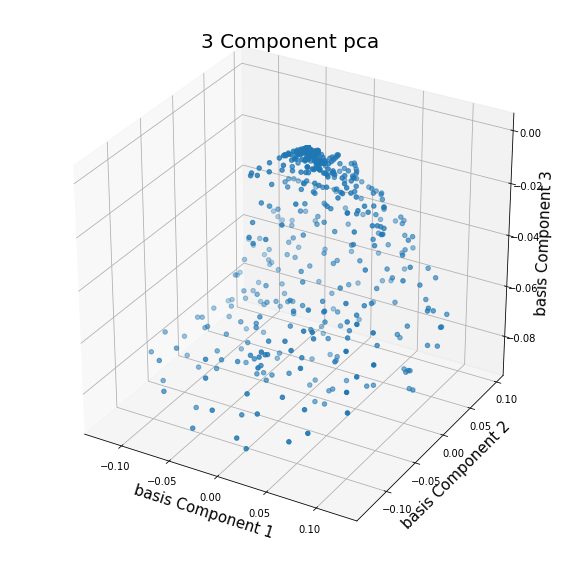

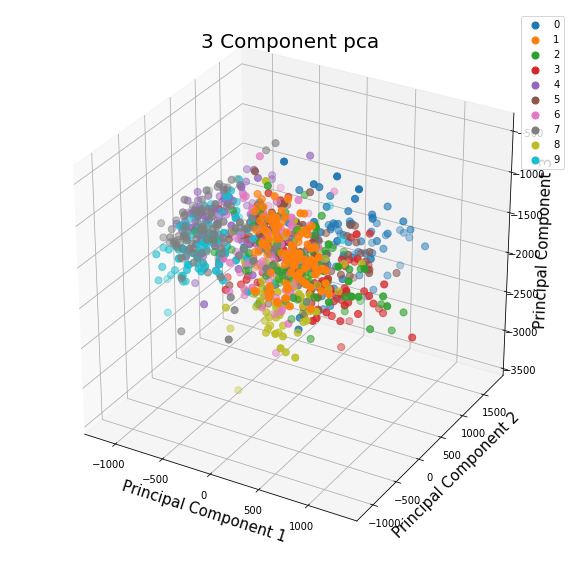

In [17]:
def mnist_pca(trainX,trainY,M,plotting=1):
    D1 = trainX.shape[1]
    D2 = trainX.shape[2] 
    D = trainX.shape[1]*trainX.shape[2]
    N = trainX.shape[0]
    X = trainX.reshape(N,D)
    X = X.T
    mu = (1.0/N)*np.mean(X,axis=1)
    mu = mu.reshape(len(mu),1)
    X = X - mu
    cov = (1.0/N)*(X.dot(X.T))
    eigenval,eigenvec = np.linalg.eig(cov)
    eigenvec = eigenvec.T
    indices = np.argsort(eigenval)
    indices = indices[D-M:D]
    eigenvec = eigenvec[indices]
    Y = eigenvec.dot(X)
    Xreconstruct = (eigenvec.T).dot(Y)
    Xreconstruct[Xreconstruct<0]=0
    Xreconstruct = Xreconstruct.T
    X = Xreconstruct.reshape(N,D1,D2)
    Y = Y.T
    if(plotting==1):
        fig1 = plt.figure(figsize = (10,10))
        for i in range(1,10):
            plt.subplot(330 + i)
            plt.imshow(X[visit[i]], cmap=plt.get_cmap('gray'))
        plt.show()
    if(plotting==1):
        plot_basis(eigenvec.T,'pca',M)
    if(M==2 and plotting==1):
        plot_data_2d(Y,'pca')
    if(M==3 and plotting==1):
        plot_data_3d(Y,'pca')

mnist_pca(trainX,trainY,2)
mnist_pca(trainX,trainY,3)

0 200117241267.15656
5 194622694358.8668
10 192174477709.75983
15 186332888507.71393
20 180990940563.0381
25 179044578969.2443
30 178314880209.15677
35 177971286982.25073


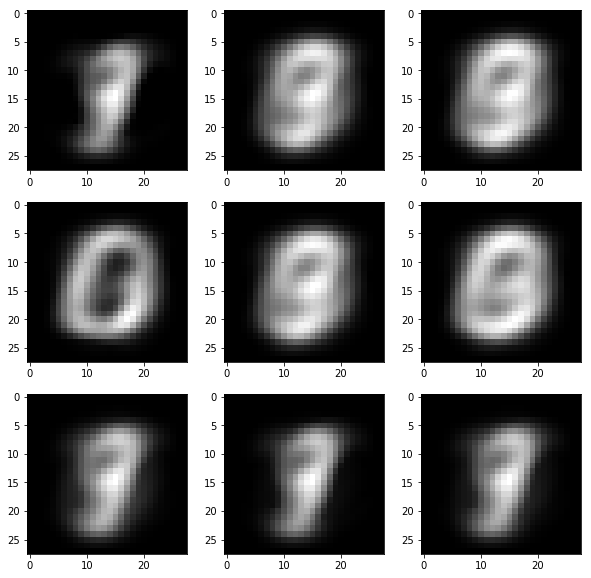

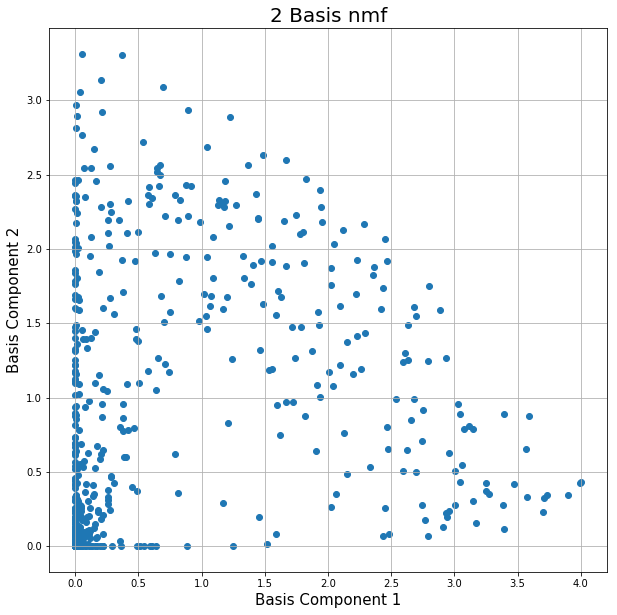

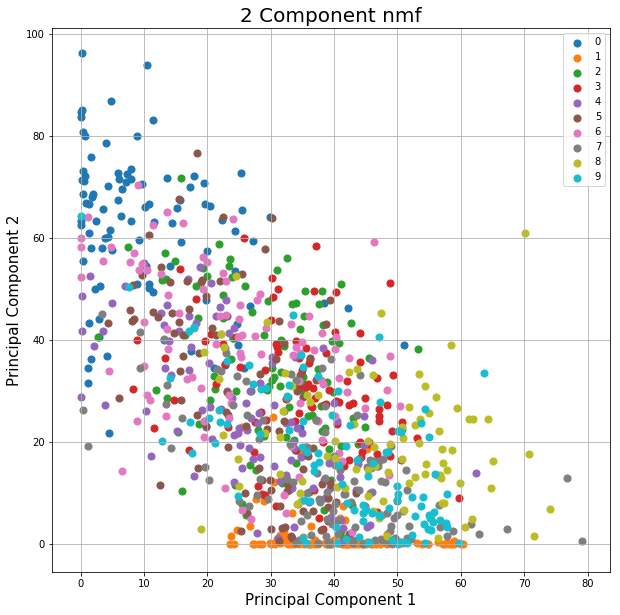

In [19]:
def mnist_nmf(trainX,trainY,R,plotting=1):
    D1 = trainX.shape[1]
    D2 = trainX.shape[2] 
    N = trainX.shape[1]*trainX.shape[2]
    M = trainX.shape[0]
    V = (trainX.reshape(M,N)).T
    W = np.random.rand(N,R)
    H = np.random.rand(R,M)
    E = np.sum(np.power(V-np.dot(W,H),2))
    epsilon = 0.00001
    tol=0.001
    iters = 40
    for i in range(iters):
        H1 = W.T.dot(V)
        H2 = W.T.dot(W.dot(H))
        H = H*(1.0*(H1/(H2+epsilon)))
        W1 = V.dot(H.T)
        W2 = W.dot(H.dot(H.T))
        W = W*(1.0*(W1/(W2+epsilon)))
        V1 = W.dot(H)
        E = np.sum(np.square(V-V1))
        if(i%5==0):
            print(i,E)
    Xreconstruct = np.dot(W,H)
    Xreconstruct = Xreconstruct.T
    X = Xreconstruct.reshape(M,D1,D2)
    Y = H.T
    if(plotting==1):
        fig1 = plt.figure(figsize = (10,10))
        for i in range(1,10):
            plt.subplot(330 + i)
            plt.imshow(X[visit[i]], cmap=plt.get_cmap('gray'))
        plt.show()
    if(plotting==1):
        plot_basis(W,'nmf',R)    
    if(R==2 and plotting==1):
        plot_data_2d(Y,'nmf')
    if(R==3 and plotting==1):
        plot_data_3d(Y,'nmf')
    return W
W = mnist_nmf(trainX,trainY,2)        
W = mnist_nmf(trainX,trainY,3)

-5582089.8935457785
-5558821.483768007
-5552953.6470424915
-5550250.423954812
-5547464.999606213
-5544800.170405124
-5543244.423809787
-5541829.48162612
-5540736.10334085
-5539967.692340047
-5539375.501564302
-5538898.2917430885
-5538399.163204959
-5538020.122035848
-5537814.568259716


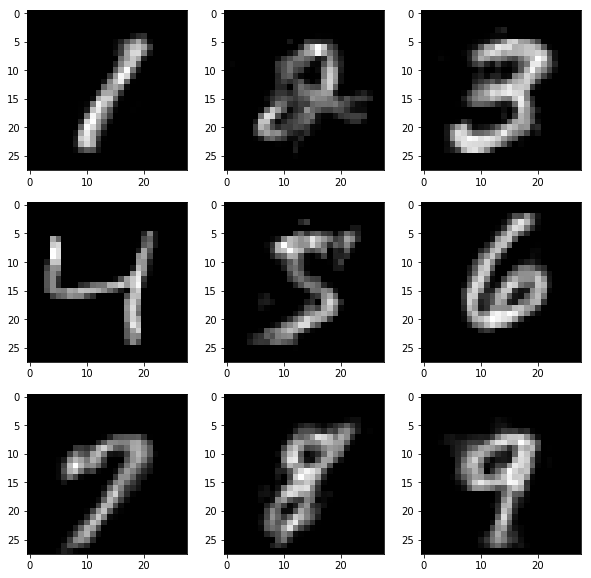

In [11]:
def mnist_plca(trainX,trainY,z,plotting=1):
    t = trainX.shape[0]
    D1 = trainX.shape[1]
    D2 = trainX.shape[2]
    f = trainX.shape[1]*trainX.shape[2]
    V = (trainX.reshape(t,f)).T
    p_z = np.random.rand(z,t)
    p_f_z = np.random.rand(f,z)
    q_z_f = np.zeros((z,f,t))
    iters = 40
    epochs=15
    eps = 0.00001
    for k in range(epochs):
        for i in range(iters):
            q_sum = np.zeros((f,t))
            for j in range(z):
                q_sum = q_sum + np.dot(np.reshape(p_f_z[:,j],(len(p_f_z[:,j]),1)),np.reshape(p_z[j,:],(len(p_z[j,:]),1)).T)
            for j in range(z):
                q_z_f[j] = np.dot(np.reshape(p_f_z[:,j],(len(p_f_z[:,j]),1)),np.reshape(p_z[j,:],(len(p_z[j,:]),1)).T)/(q_sum+eps)
            p_sum = np.zeros((1,t))
            for j in range(z):
                p_sum = p_sum + np.sum(V*q_z_f[j],axis=0)
            for j in range(z):
                p_z[j] = np.sum(V*q_z_f[j],axis=0)/(p_sum+eps)
            f_sum = np.zeros((1,z))
            for j in range(f):
                f_sum = f_sum + np.dot(np.reshape(V[j],(len(V[j]),1)).T,q_z_f[:,j,:].T)
            for j in range(f):
                p_f_z[j] = np.dot(np.reshape(V[j],(len(V[j]),1)).T,q_z_f[:,j,:].T)/(f_sum+eps)
        print(np.sum(V*np.log10(np.dot(p_f_z,p_z)+eps)))
    X = np.dot(p_f_z,p_z).T
    X = np.reshape(X,(t,D1,D2))
    Y = p_z.T
    if(plotting==1):
        fig1 = plt.figure(figsize = (10,10))
        for i in range(1,10):
            plt.subplot(330 + i)
            plt.imshow(X[visit[i]], cmap=plt.get_cmap('gray'))
        plt.show()
    if(plotting==1):
        plot_basis(p_z_f,'plca',z)
    if(z==2 and plotting==1):
        plot_data_2d(Y,'plca')
    if(z==3 and plotting==1):
        plot_data_3d(Y,'plca')
    return p_f_z
W = mnist_plca(trainX[:100],trainY[:100],2)
W = mnist_plca(trainX[:100],trainY[:100],3)

In [10]:
def nmf_classi_mnist(M):
    indices = [[],[],[],[],[],[],[],[],[],[]]
    for i, value in enumerate(trainY[:5000]):
        indices[value].append(i)
    T = 1000
    W = np.zeros((10,784,M))
    for i in range(10):
        W[i] = mnist_nmf(trainX[indices[i]],trainY[indices[i]],M,0)
    W_ = np.hstack((W[0],W[1]))
    for i in range(2,10):
        W_ = np.hstack((W_,W[i]))
    V = testX[:T]
    V = np.reshape(V,(T,784))
    V_test=V.T
    H_ = np.dot(np.linalg.pinv(W_),V_test)
    H = np.zeros((10,M,T))
    H_[H_<0]=0
    for i in range(10):
        H[i] = H_[(M*i):(M*(i+1)),:]
    pred = []
    e_min = np.zeros((T,1))
    index = (-1.0)*np.ones((T,1))
    for i in range(T):
        for j in range(10):
            e = np.sum(H[j,:,i])
            if(e_min[i][0]<e):
                e_min[i][0]=e
                index[i][0]=j
    score = 0
    G = testY[:T]
    CM = np.zeros((10,10))
    for i in range(T):
        CM[int(G[i])][int(index[i][0])]+=1
        if(index[i][0]==G[i]):
            score+=1
    print("accuracy = ",score/T)
    print(" ")
    print("confusion matrix")
    print(CM)
    
nmf_classi_mnist(200)

accuracy =  0.722
 
confusion matrix
[[ 70.   0.   2.   0.   0.   0.   6.   0.   7.   0.]
 [  0. 120.   1.   3.   0.   1.   1.   0.   0.   0.]
 [  5.   4.  86.   7.   1.   1.   4.   2.   6.   0.]
 [  0.   2.  20.  64.   3.   3.   1.   4.   7.   3.]
 [  3.   3.   2.   4.  85.   2.   1.   1.   1.   8.]
 [  3.   1.   2.   4.   4.  52.   3.   2.  13.   3.]
 [  8.   1.   6.   0.   0.   1.  68.   0.   3.   0.]
 [  0.  10.   3.   4.   5.   0.   1.  54.   0.  22.]
 [  4.  10.   5.   3.   6.   3.   2.   2.  52.   2.]
 [  2.   2.   1.   0.  11.   0.   0.   4.   3.  71.]]
